Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.GZY11S_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


582/582 ━━━━━━━━━━━━━━━━━━━━ 536s 876ms/step - accuracy: 0.6174 - loss: 0.6948 - val_accuracy: 0.6883 - val_loss: 0.5939
Epoch 2/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 539s 885ms/step - accuracy: 0.7512 - loss: 0.5108 - val_accuracy: 0.7463 - val_loss: 0.5128
Epoch 3/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 569s 937ms/step - accuracy: 0.8084 - loss: 0.4150 - val_accuracy: 0.7683 - val_loss: 0.4939
Epoch 4/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 524s 859ms/step - accuracy: 0.8557 - loss: 0.3312 - val_accuracy: 0.7752 - val_loss: 0.4801
Epoch 5/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 539s 884ms/step - accuracy: 0.9047 - loss: 0.2368 - val_accuracy: 0.7782 - val_loss: 0.5710
Epoch 6/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 539s 884ms/step - accuracy: 0.9413 - loss: 0.1535 - val_accuracy: 0.7827 - val_loss: 0.6100
Epoch 7/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 545s 894ms/step - accuracy: 0.9627 - loss: 0.1091 - val_accuracy: 0.7887 - val_loss: 0.7121
Epoch 8/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 530s 842ms/step - accuracy: 0.9720 - loss: 0.08

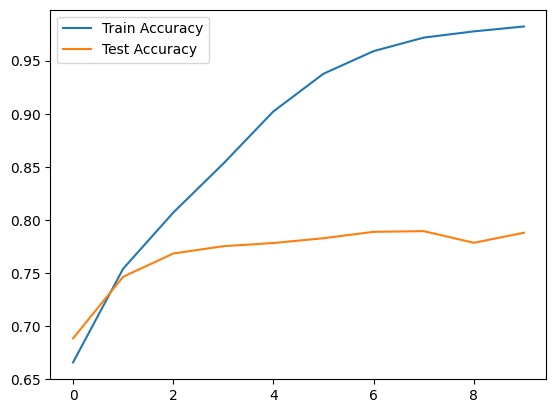

In [2]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# 1. Cargar el dataset
(ds_train, ds_test), ds_info = tfds.load(
    'cats_vs_dogs', split=['train[:80%]', 'train[80%:]'], as_supervised=True, with_info=True
)

# 2. Preprocesamiento de imágenes
def preprocess(image, label):
    image = tf.image.resize(image, (128, 128)) / 255.0  # Normalización
    return image, label

ds_train = ds_train.map(preprocess).batch(32).shuffle(1000)
ds_test = ds_test.map(preprocess).batch(32)

# 3. Definir la CNN
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')  # Clasificación binaria
])

# 4. Compilar y entrenar
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(ds_train, validation_data=ds_test, epochs=10)

# 5. Evaluar y graficar resultados
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.show()

# 6. Guardar el modelo entrenado
model.save("cats_vs_dogs_cnn.h5")


In [3]:
model.save("cats_vs_dogs_cnn.keras")

In [4]:
import os
print(os.listdir())  # Muestra los archivos en el directorio actual


['.config', 'cats_vs_dogs_cnn.h5', 'cats_vs_dogs_cnn.keras', 'sample_data']


In [5]:
from tensorflow import keras
# Load the model using the correct syntax
modelo = keras.models.load_model("cats_vs_dogs_cnn.keras")



/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [22]:
from google.colab import files
uploaded = files.upload()


Saving lovely-pet-portrait-isolated.jpg to lovely-pet-portrait-isolated.jpg


In [23]:
import numpy as np
from tensorflow.keras.preprocessing import image

ruta_imagen = "lovely-pet-portrait-isolated.jpg"
img = image.load_img(ruta_imagen, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Añadir batch dimension
img_array /= 255.0  # Normalizar si se hizo en el entrenamiento


In [24]:
# Realizar la predicción
prediccion = modelo.predict(img_array)

# Interpretar el resultado
clases = ["Gato", "Perro"]
print(f"La imagen es un: {clases[int(prediccion[0] > 0.5)]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
La imagen es un: Gato


<ipython-input-24-3e1d61b9b8c4>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"La imagen es un: {clases[int(prediccion[0] > 0.5)]}")


In [25]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# 1. Cargar el dataset de prueba
(_, ds_test), ds_info = tfds.load(
    'cats_vs_dogs', split=['train[:80%]', 'train[80%:]'], as_supervised=True, with_info=True
)

# 2. Preprocesar imágenes (igual que en el entrenamiento)
def preprocess(image, label):
    image = tf.image.resize(image, (128, 128)) / 255.0  # Normalización
    return image, label

ds_test = ds_test.map(preprocess).batch(32)

# 3. Cargar el modelo guardado
modelo = keras.models.load_model("cats_vs_dogs_cnn.h5")

# 4. Evaluar el modelo en el conjunto de prueba
loss, accuracy = modelo.evaluate(ds_test)

# 5. Mostrar resultados
print(f"🔹 Accuracy en test: {accuracy:.4f}")
print(f"🔹 Pérdida en test: {loss:.4f}")


146/146 ━━━━━━━━━━━━━━━━━━━━ 41s 272ms/step - accuracy: 0.7868 - loss: 0.9001
🔹 Accuracy en test: 0.7878
🔹 Pérdida en test: 0.9019


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.XNWNM2_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


582/582 ━━━━━━━━━━━━━━━━━━━━ 1118s 2s/step - accuracy: 0.5567 - loss: 0.6812 - val_accuracy: 0.5954 - val_loss: 0.6489
Epoch 2/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 1108s 2s/step - accuracy: 0.7022 - loss: 0.5696 - val_accuracy: 0.7982 - val_loss: 0.4563
Epoch 3/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 1101s 2s/step - accuracy: 0.7945 - loss: 0.4398 - val_accuracy: 0.8027 - val_loss: 0.4183
Epoch 4/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 1101s 2s/step - accuracy: 0.8378 - loss: 0.3699 - val_accuracy: 0.8334 - val_loss: 0.3654
Epoch 5/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 1101s 2s/step - accuracy: 0.8689 - loss: 0.3064 - val_accuracy: 0.8590 - val_loss: 0.3253
Epoch 6/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 1108s 2s/step - accuracy: 0.8985 - loss: 0.2480 - val_accuracy: 0.8725 - val_loss: 0.2896
Epoch 7/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 1099s 2s/step - accuracy: 0.9190 - loss: 0.1927 - val_accuracy: 0.8917 - val_loss: 0.2914
Epoch 8/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 1180s 2s/step - accuracy: 0.9406 - loss: 0.1442 - val_accurac

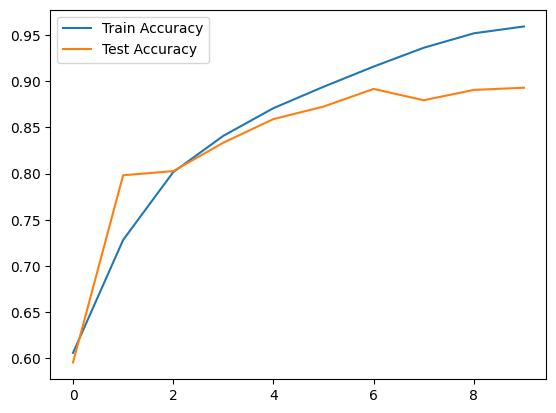

In [1]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# 1. Cargar el dataset
(ds_train, ds_test), ds_info = tfds.load(
    'cats_vs_dogs', split=['train[:80%]', 'train[80%:]'], as_supervised=True, with_info=True
)

# 2. Preprocesamiento de imágenes
def preprocess(image, label):
    image = tf.image.resize(image, (150, 150)) / 255.0  # Normalización
    return image, label

ds_train = ds_train.map(preprocess).batch(32).shuffle(1000)
ds_test = ds_test.map(preprocess).batch(32)

# 3. Definir la CNN con más capas convolucionales
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Conv2D(256, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')  # Clasificación binaria
])

# 4. Compilar y entrenar
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(ds_train, validation_data=ds_test, epochs=10)

# 5. Evaluar y graficar resultados
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.show()

# 6. Guardar el modelo entrenado
model.save("cats_vs_dogs_cnn_v2.h5")


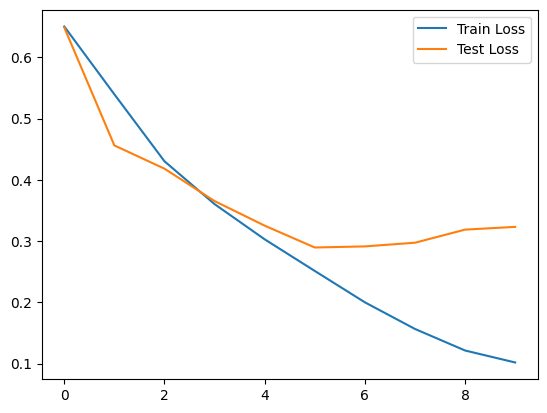

In [2]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.show()
